# Experiment 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

# Retrieve color cycle from ggplot style
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#print(colors)

# Map models to specific colors
color_map = {'iTransformer': colors[0], 'PatchTST': colors[1], 'Autoformer': colors[2], 'Informer': colors[3], 'Transformer': colors[4], 
             'TSMixer': colors[5], 'DLinear': colors[6], 'LSTM': colors[7], 
             'XGBoost': colors[8], 'Linear Regression': colors[9], 'Ridge': colors[9]}

%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp4'

In [2]:
targets = ["multi", "load", "solar", "wind"] 
horizons = ['24', '96', '192', '336', '720']  
models = ['iTransformer', 'Transformer', "LSTM", "XGBoost", "Linear Regression", "Ridge"]
metrics = ['MSE', 'MAE']  

## Import data and plot all benchmark results

In [3]:
idx = pd.IndexSlice
benchmark_table = pd.read_csv("./../../results/benchmark_table_Exp4_metrics.csv", header=[0, 1], index_col=[0, 1]).loc[['multi', 'load'], idx[models, :]].replace('-', np.nan).astype(float)
epoch_time_table = pd.read_csv("./../../results/benchmark_table_Exp4_epoch_time.csv", header=[0, 1], index_col=[0, 1]).loc['multi', idx[models, :]].replace('-', np.nan).astype(float)
modelsize_maxmemory_table = pd.read_csv("./../../results/benchmark_table_Exp4_modelsize_maxmemory.csv", header=[0, 1], index_col=[0, 1]).loc['multi', idx[models, :]].replace('-', np.nan).astype(float)

benchmark_table = benchmark_table.drop(columns="Linear Regression")
#benchmark_table = pd.concat((benchmark_table, benchmark_table2), axis=1)
#models.append("Ridge Regression")
benchmark_table

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_7065/1503901458.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table = benchmark_table.drop(columns="Linear Regression")


Model          iTransformer         Transformer            LSTM          \
Metric                  MSE     MAE         MSE     MAE     MSE     MAE   
Target Horizon                                                            
multi  24               NaN     NaN      0.0592  0.1596  0.0654  0.1717   
       96               NaN     NaN      0.0670  0.1688  0.0973  0.2168   
       192              NaN     NaN      0.0643  0.1685  0.1105  0.2310   
       336              NaN     NaN      0.0688  0.1762  0.1079  0.2289   
       720              NaN     NaN      0.0722  0.1809  0.1139  0.2361   
load   24            0.0229  0.1040      0.0211  0.1098  0.0431  0.1451   
       96            0.0421  0.1385      0.0412  0.1520  0.0715  0.1907   
       192           0.0486  0.1523      0.0479  0.1666  0.0909  0.2207   
       336           0.0689  0.1831      0.0506  0.1743  0.0978  0.2313   
       720           0.0677  0.1856      0.0654  0.1964  0.1139  0.2559   

Model          XGBoost           Ridge          
Metric             MSE     MAE     MSE     MAE  
Target Horizon                                  
multi  24       0.0634  0.1611  0.1926  0.2973  
       96       0.0763  0.1789  0.2785  0.3616  
       192      0.0806  0.1843  0.3100  0.3814  
       336      0.0886  0.1943  0.3542  0.4106  
       720      0.1209  0.2287  0.4450  0.4761  
load   24       0.0386  0.1384  0.0487  0.1453  
       96       0.0662  0.1770  0.0853  0.1919  
       192      0.0760  0.1892  0.1017  0.2130  
       336      0.0813  0.1969  0.1188  0.2427  
       720      0.0946  0.2123  0.1494  0.2902

# Plot again but highlight best value

In [4]:
def highlight_min(s):
    '''
    Highlight the minimum in a Series green.
    '''
    s_mse = s.xs("MSE", axis=0, level=1)
    is_min_mse = s_mse == s_mse.min()
    s_mae = s.xs("MAE", axis=0, level=1)
    is_min_mae = s_mae == s_mae.min()

    is_min = s.copy()
    
    is_min.loc[:,"MSE"] = is_min_mse.values
    is_min.loc[:,"MAE"] = is_min_mae.values

    return ['background-color: green' if v else '' for v in is_min]

styled_df = benchmark_table.style.apply(highlight_min, axis=1)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_7065/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False  True False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values


In [5]:
# Calculate the number of times a model has been the best model
MSE_values = benchmark_table.xs("MSE", axis=1, level=1)
MAE_values = benchmark_table.xs("MAE", axis=1, level=1)
models_min_MSE = MSE_values.min(axis=1)
models_min_MAE = MAE_values.min(axis=1)
counter = {model: 0 for model in models if model != "Dummy"}

for i, row in enumerate(MSE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MSE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

for i, row in enumerate(MAE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MAE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

best_model_counter = pd.Series(counter)
print(best_model_counter)



#iTransformer:  7, 7
#PatchTST:      8, 6
#Autoformer:    0, 0
#Informer:      3, 3
#Transformer:   4, 4

#TSMixer:       2, 2
#DLinear:       8, 1
#LSTM           4, 0
#XGBoost:       8, 4
#LR:            5, 0

#Insgesamt: 40, 20

iTransformer          4
Transformer          16
LSTM                  0
XGBoost               0
Linear Regression     0
Ridge                 0
dtype: int64


In [6]:
#print(benchmark_table.sum(axis=0))
avg = benchmark_table.sum(axis=0)/benchmark_table.shape[0]
#print(avg_without_wind)
#stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
avg_mse = avg.loc[pd.IndexSlice[:, 'MSE']]


#std1 = stds.loc[pd.IndexSlice[:, 'MSE']]
#print(pd.concat((averages1,std1), axis=1))
#print(averages1)

avg_mae = avg.loc[pd.IndexSlice[:, 'MAE']]
#std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
#print(pd.concat((averages2,std2), axis=1))
#print(averages2)

avg = (avg_mse + avg_mae) / 2
#print(avg)
imp_over_lr = round((1- (avg / avg.loc["Ridge"])) * 100)

#print(avg)
#print(avg_without_wind)
print("Improvement over Ridge Regression")
print(imp_over_lr)
print("\n")


Improvement over Ridge Regression
Model
iTransformer    80.0
Transformer     57.0
LSTM            40.0
XGBoost         48.0
Ridge            0.0
dtype: float64




In [7]:
imp_over_lr.to_latex("./../../results/benchmark_table_Exp3.1_metrics_impr.tex")
#best_model_counter.to_latex("./../../results/benchmark_table_Exp1_metrics_best_model_counter.tex")

## Epochs and time needed for training

In [8]:
epoch_time_table

Model   iTransformer           Transformer             LSTM           XGBoost  \
Metric        epochs time[min]      epochs time[min] epochs time[min]  epochs   
Horizon                                                                         
24               NaN       NaN         7.0      15.0    6.0      11.0     NaN   
96               NaN       NaN         9.0      23.0    4.0      11.0     NaN   
192              NaN       NaN         6.0      34.0    4.0      16.0     NaN   
336              NaN       NaN         6.0      45.0    5.0      29.0     NaN   
720              NaN       NaN         6.0      74.0    6.0      62.0     NaN   

Model             Linear Regression            Ridge            
Metric  time[min]            epochs time[min] epochs time[min]  
Horizon                                                         
24           62.0               NaN       NaN    NaN       0.0  
96          495.0               NaN       NaN    NaN       1.0  
192         531.0               NaN       NaN    NaN       1.0  
336         277.0               NaN       NaN    NaN       0.0  
720         302.0               NaN       NaN    NaN       0.0

In [9]:
averages = (epoch_time_table.sum(axis=0)/epoch_time_table.shape[0])
stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = averages.loc[pd.IndexSlice[:, 'epochs']]
std1 = stds.loc[pd.IndexSlice[:, 'epochs']]
print("Average number of epochs and standard deviation")
print(pd.concat((averages1,std1), axis=1))
print("\n")

averages2 = averages.loc[pd.IndexSlice[:, 'time[min]']]
std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
print("Average training time[min] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of epochs and standard deviation
                     0        1
Model                          
iTransformer       0.0      NaN
Transformer        6.8  1.30384
LSTM               5.0  1.00000
XGBoost            0.0      NaN
Linear Regression  0.0      NaN
Ridge              0.0      NaN


Average training time[min] and standard deviation
                       0           1
Model                               
iTransformer         0.0         NaN
Transformer         38.2   22.993477
LSTM                25.8   21.533695
XGBoost            333.4  189.066919
Linear Regression    0.0         NaN
Ridge                0.4    0.547723


# Modelsize and Memory

In [10]:
modelsize_maxmemory_table

Model   iTransformer              Transformer                     LSTM  \
Metric  params[Mio.] max_mem[MB] params[Mio.] max_mem[MB] params[Mio.]   
Horizon                                                                  
24               NaN         NaN          5.6      5204.0         33.8   
96               NaN         NaN          5.6      6289.0         33.8   
192              NaN         NaN         11.1     15530.0         33.8   
336              NaN         NaN         11.1     21356.0         33.8   
720              NaN         NaN          9.3     35535.0         33.8   

Model                    XGBoost             Linear Regression              \
Metric  max_mem[MB] params[Mio.] max_mem[MB]      params[Mio.] max_mem[MB]   
Horizon                                                                      
24           1155.0          NaN         0.0               NaN         NaN   
96           1408.0          NaN         0.0               NaN         NaN   
192          1916.0          NaN         0.0               NaN         NaN   
336          2619.0          NaN         0.0               NaN         NaN   
720          4365.0          NaN         0.0               NaN         NaN   

Model          Ridge              
Metric  params[Mio.] max_mem[MB]  
Horizon                           
24               NaN         NaN  
96               NaN         NaN  
192              NaN         NaN  
336              NaN         NaN  
720              NaN         NaN

In [11]:
averages = (modelsize_maxmemory_table.sum(axis=0)/modelsize_maxmemory_table.shape[0])
stds = modelsize_maxmemory_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = round(averages.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
std1 = round(stds.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
print("Average number of parameters[Mio.] and standard deviation")
print(pd.concat((averages1,std1), axis=1))

averages2 = round(averages.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
std2 = round(stds.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
print("\n")
print("Average maximum memory[MB] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of parameters[Mio.] and standard deviation
                      0    1
Model                       
iTransformer        0.0  NaN
Transformer         8.5  2.8
LSTM               33.8  0.0
XGBoost             0.0  NaN
Linear Regression   0.0  NaN
Ridge               0.0  NaN


Average maximum memory[MB] and standard deviation
                         0        1
Model                              
iTransformer           0.0      NaN
Transformer        16782.8  12433.0
LSTM                2292.6   1286.5
XGBoost                0.0      0.0
Linear Regression      0.0      NaN
Ridge                  0.0      NaN


In [12]:
benchmark_table

Model          iTransformer         Transformer            LSTM          \
Metric                  MSE     MAE         MSE     MAE     MSE     MAE   
Target Horizon                                                            
multi  24               NaN     NaN      0.0592  0.1596  0.0654  0.1717   
       96               NaN     NaN      0.0670  0.1688  0.0973  0.2168   
       192              NaN     NaN      0.0643  0.1685  0.1105  0.2310   
       336              NaN     NaN      0.0688  0.1762  0.1079  0.2289   
       720              NaN     NaN      0.0722  0.1809  0.1139  0.2361   
load   24            0.0229  0.1040      0.0211  0.1098  0.0431  0.1451   
       96            0.0421  0.1385      0.0412  0.1520  0.0715  0.1907   
       192           0.0486  0.1523      0.0479  0.1666  0.0909  0.2207   
       336           0.0689  0.1831      0.0506  0.1743  0.0978  0.2313   
       720           0.0677  0.1856      0.0654  0.1964  0.1139  0.2559   

Model          XGBoost           Ridge          
Metric             MSE     MAE     MSE     MAE  
Target Horizon                                  
multi  24       0.0634  0.1611  0.1926  0.2973  
       96       0.0763  0.1789  0.2785  0.3616  
       192      0.0806  0.1843  0.3100  0.3814  
       336      0.0886  0.1943  0.3542  0.4106  
       720      0.1209  0.2287  0.4450  0.4761  
load   24       0.0386  0.1384  0.0487  0.1453  
       96       0.0662  0.1770  0.0853  0.1919  
       192      0.0760  0.1892  0.1017  0.2130  
       336      0.0813  0.1969  0.1188  0.2427  
       720      0.0946  0.2123  0.1494  0.2902

In [13]:
#Save to latex
formatted_df= benchmark_table.round(3)
formatted_df = formatted_df.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)
formatted_df.to_latex("./../../results/benchmark_table_Exp3.1_metrics.tex")

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_7065/1188389363.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = formatted_df.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)


## MSE - horizon plot for each target

In [14]:


bms = []
bms_et = []
for target in ["multi", "load"]:
    bm = benchmark_table.xs(target, level=0, axis=0)
    bm_mse = bm.xs('MSE', level=1, axis=1)
    bm_mae = bm.xs('MAE', level=1, axis=1)
    bms.append((bm_mse, bm_mae))

In [15]:
# Remove linear regression from list models
models = [model for model in models if model != "Linear Regression"]
models

['iTransformer', 'Transformer', 'LSTM', 'XGBoost', 'Ridge']

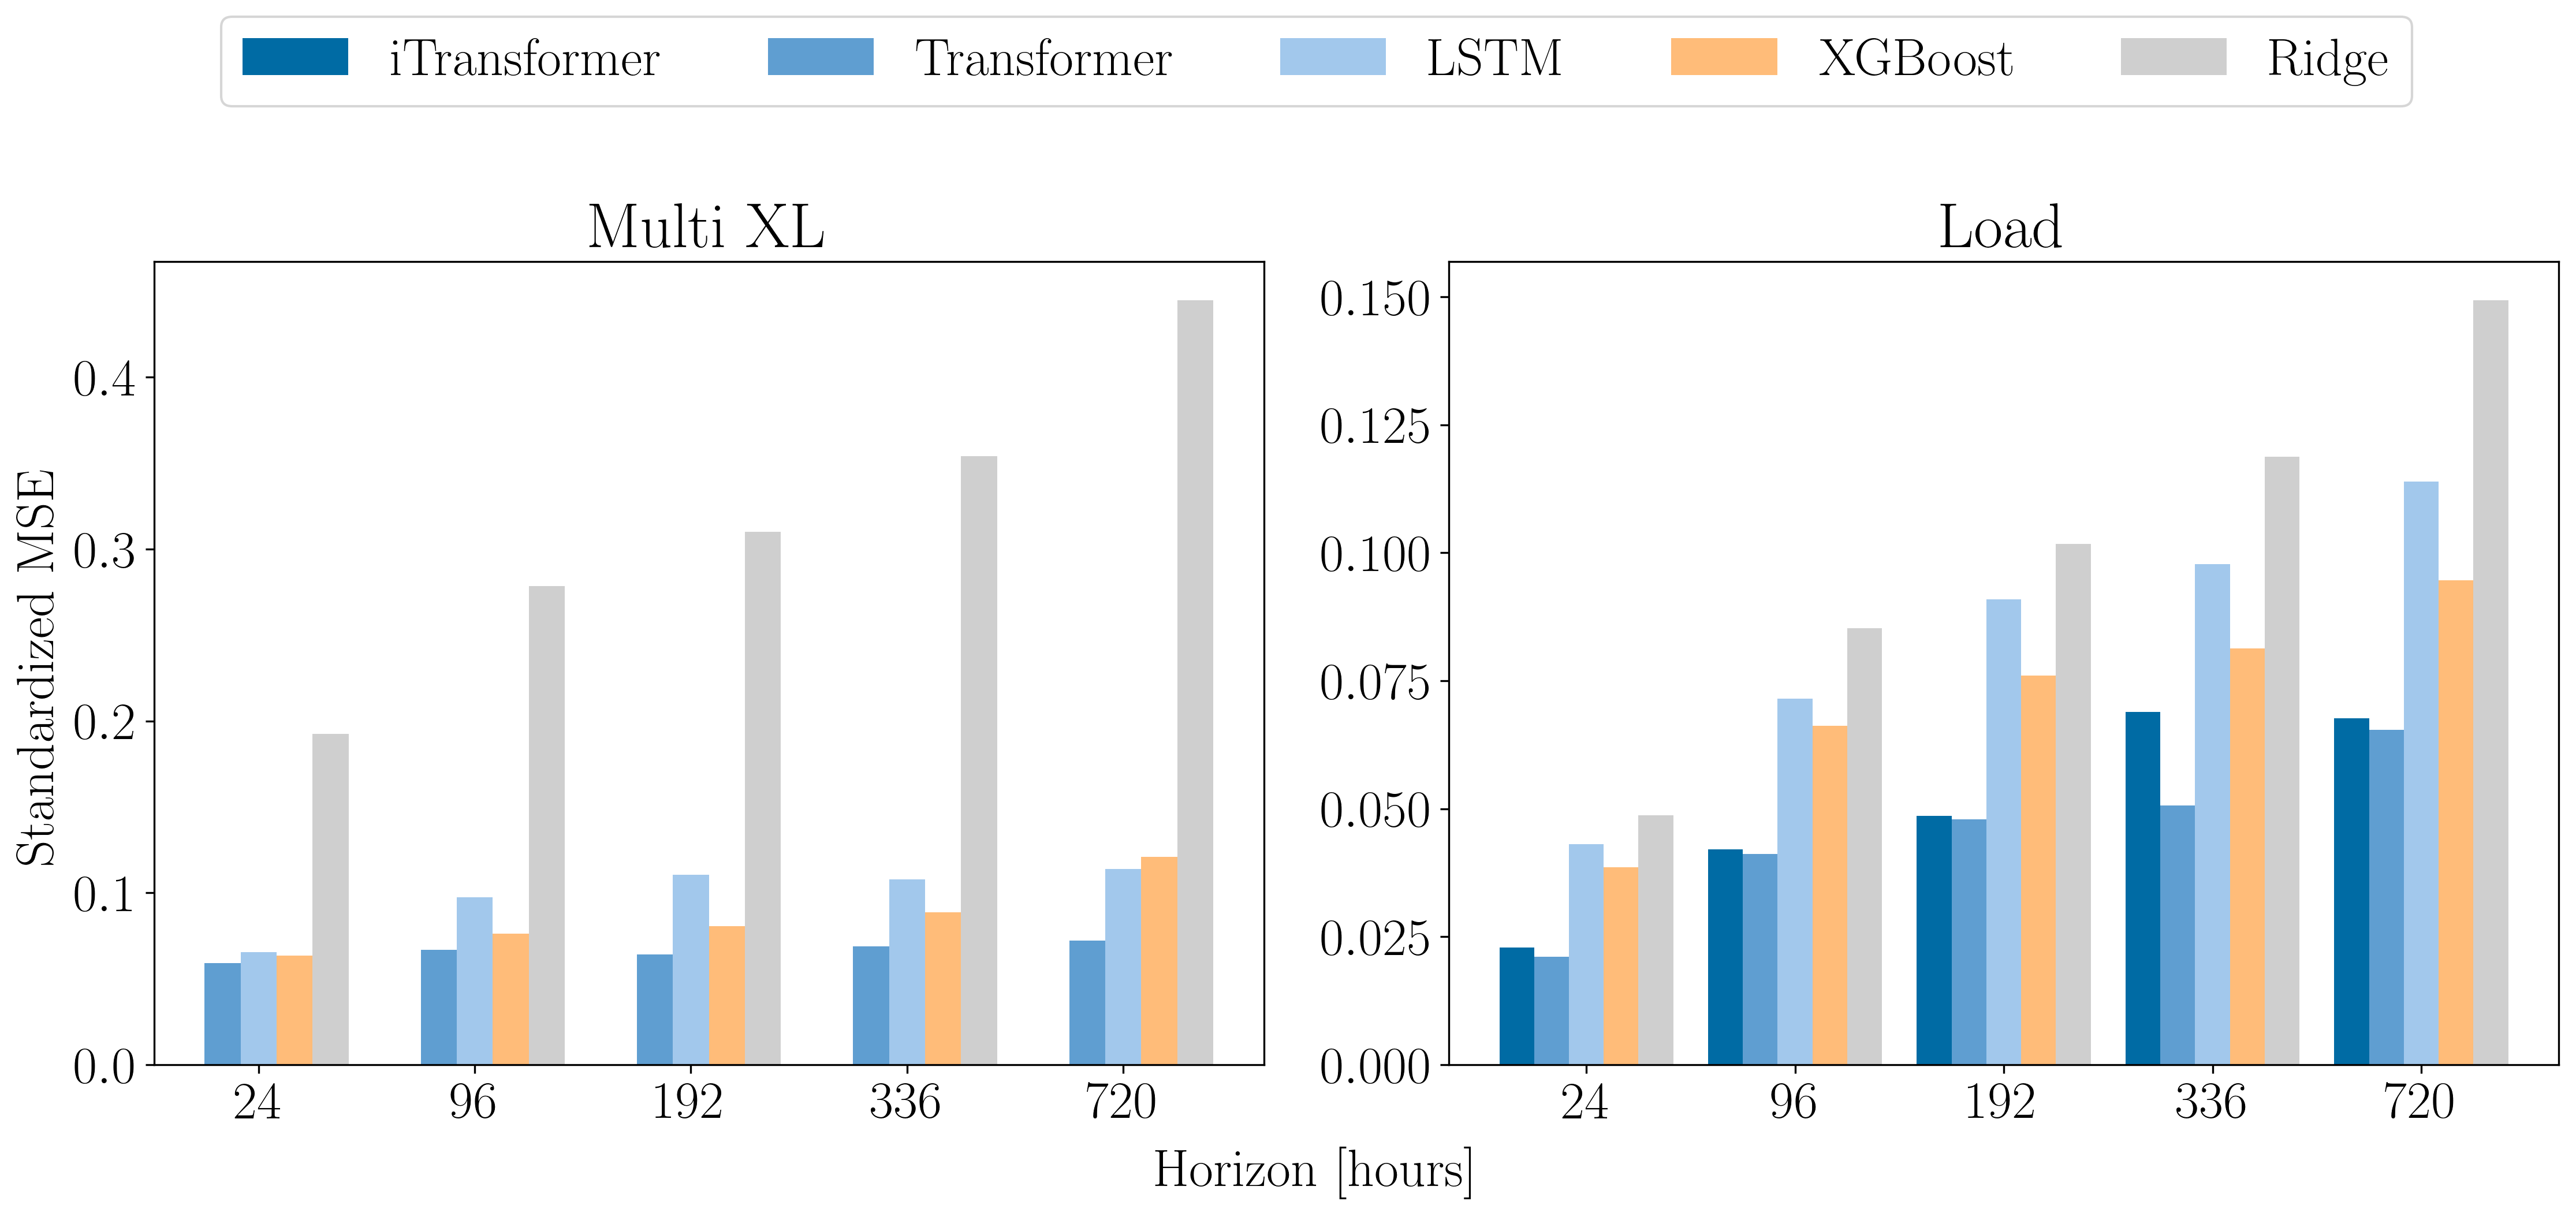

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Adjusted size for better visibility of bars

# Example colors for the models
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#e377c2", "#bcbd22", "#7f7f7f"]

# Example data
# Assuming each bm_mse for each i is a DataFrame where columns are models and rows are horizons
for i, (bm_mse, bm_mae) in enumerate(bms):
    #horizons = np.arange(bm_mse.shape[0])  # Number of horizons
    bar_width = 1 / (len(bm_mse.columns) + 1)  # Width of each bar, adjusted for number of models
    #bar_width = 0.1
    for j, model in enumerate(bm_mse.columns):
        # Position of each bar grouped by horizon
        positions = np.arange(bm_mse.shape[0]) + j * bar_width

        # Plotting the bar for each model at each horizon
        ax[i].bar(positions, bm_mse[model], width=bar_width, color=color_map[model], label=model if i == 0 else "")

    ax[i].set_title("Multi XL" if i==0 else "Load")
    ax[i].set_xticks(np.arange(bm_mse.shape[0]) + bar_width * (len(bm_mse.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    #print(horizons)
    ax[i].set_xticklabels([f'{x}' for x in horizons])  # Assuming horizons are like 0h, 1h, etc.
    #ax[i].set_xlabel('Horizon [hours]')

#f.legend(loc='upper')  # Only one legend
fig.legend(models, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'Standardized MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()



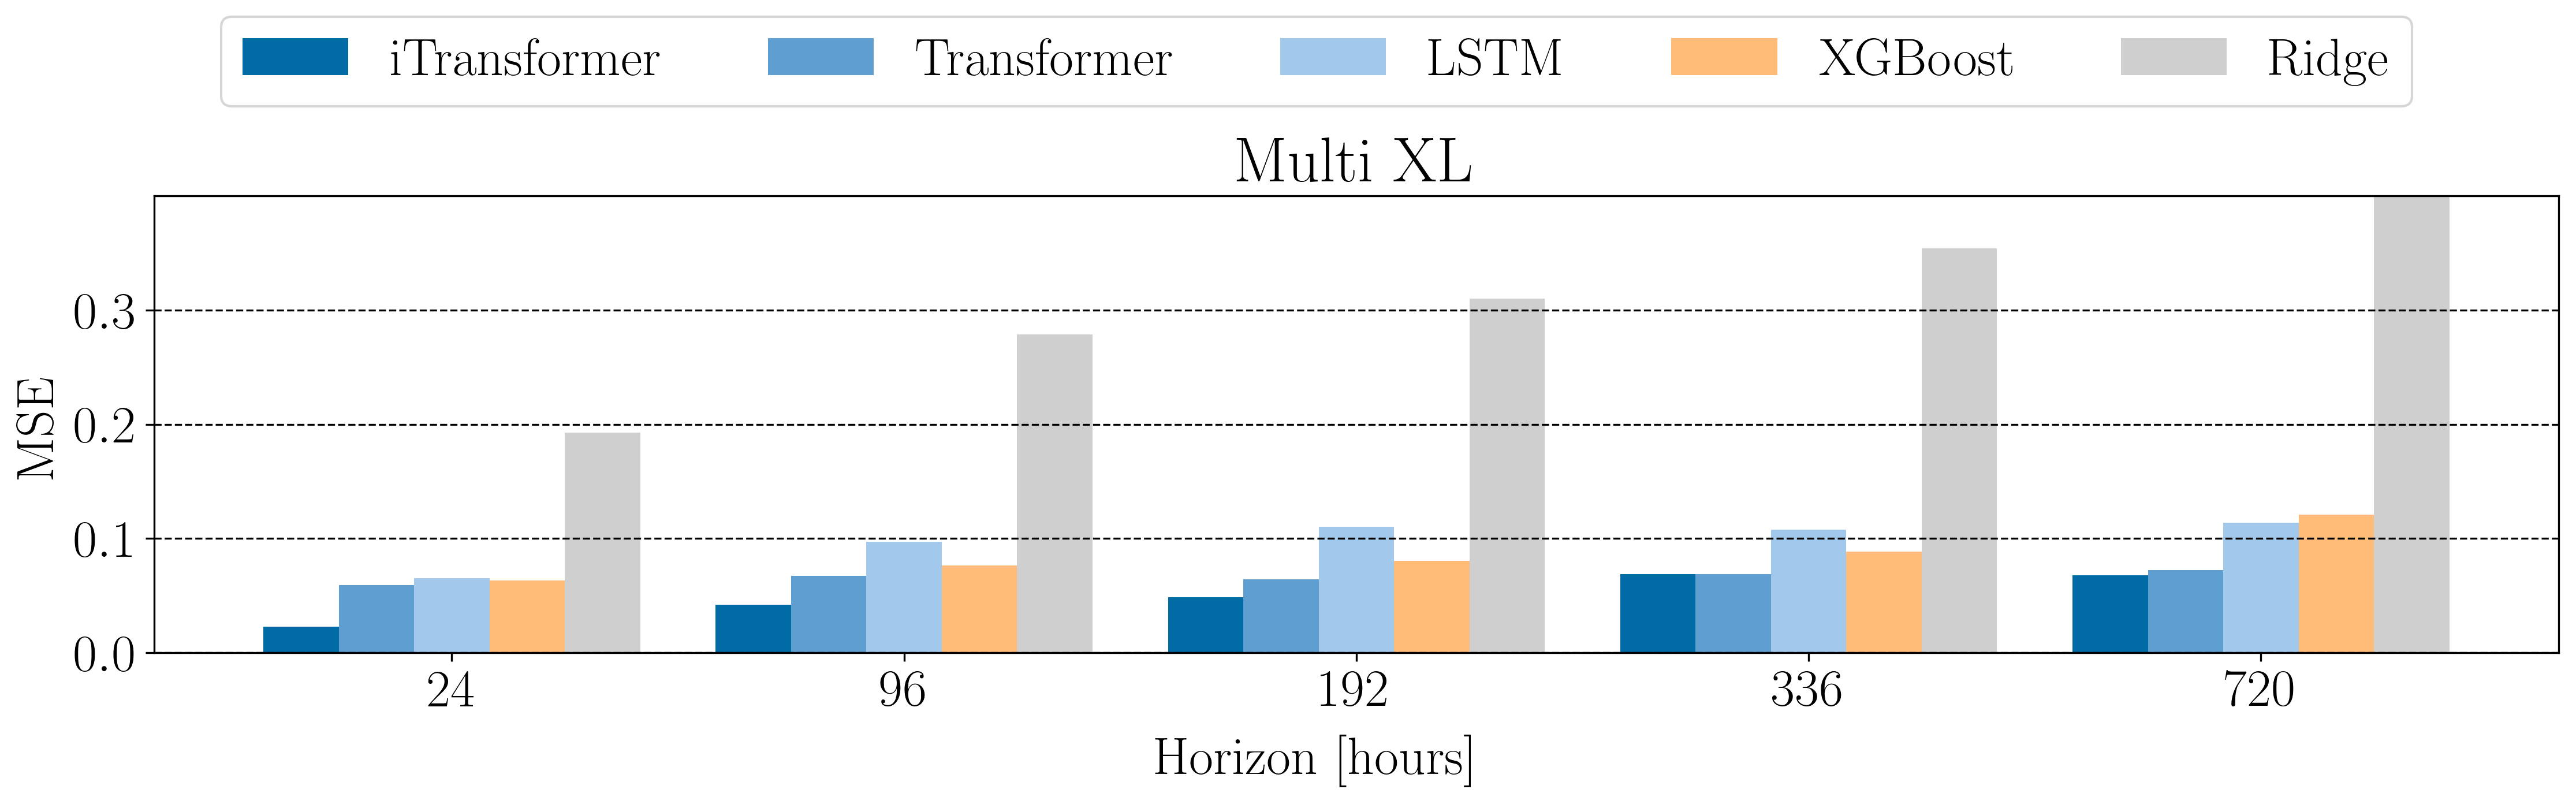

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(15, 4))  # Adjusted size for better visibility of bars

# Example colors for the models
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#e377c2", "#bcbd22", "#7f7f7f"]

# Example data
# Assuming each bm_mse for each i is a DataFrame where columns are models and rows are horizons
for i, (bm_mse, bm_mae) in enumerate(bms):
    bar_width = 1 / (len(bm_mse.columns) + 1)  # Width of each bar, adjusted for number of models

    for j, model in enumerate(bm_mse.columns):
        # Position of each bar grouped by horizon
        positions = np.arange(bm_mse.shape[0]) + j * bar_width

        # Plotting the bar for each model at each horizon
        ax.bar(positions, bm_mse[model], width=bar_width, color=color_map[model], label=model if i == 0 else "")

    ax.set_title('Multi XL')
    ax.set_xticks(np.arange(bm_mse.shape[0]) + bar_width * (len(bm_mse.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    ax.set_xticklabels([f'{x}' for x in horizons])  # Assuming horizons are like 0h, 1h, etc.
    #ax[i].set_xlabel('Horizon [hours]')
    ax.grid(True, axis='y', color='black', linestyle='--')
    ax.set_ylim(0, 0.4)
    ax.set_yticks(np.arange(0, 0.4, 0.1))


#f.legend(loc='upper')  # Only one legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=10)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()
